********************************************************************************
## Exploratory data analysis on the dataset from Hugging Face
**Description:** This notebook does the data wrangling and generates the **word cloud** for the prompts related to depression problem

**Dataset used:** Train dataset of nbertagnolli/counsel-chat
Link to the dataset --> https://huggingface.co/datasets/nbertagnolli/counsel-chat

**Use:** This provides a visual summary that aids in identifying prevalent symptoms, emotional experiences, coping strategies, risk factors, and support needs related to depression. It serves as a starting point for deeper analysis and targeted interventions aimed at improving mental health outcomes.
********************************************************************************

### Installing the required libraries

In [1]:
!pip install --q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


### Importing the required libraries

In [2]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk

In [3]:
# Load the dataset from Hugging face
# ensure you have the Hugging face token saved in secrets in google colab
dataset = load_dataset('nbertagnolli/counsel-chat')
dataset

Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/2775 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views'],
        num_rows: 2775
    })
})

In [4]:
# Accessing the training split
train_dataset = dataset['train']

In [5]:
train_dataset

Dataset({
    features: ['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic', 'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views'],
    num_rows: 2775
})

In [6]:
df = pd.DataFrame(train_dataset) #Reading as a pandas dataframe
df

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,It is very common for people to have multiple ...,3,1971
1,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Jason Lynch, MS, LMHC, LCAC, ADSIndividual & C...",https://counselchat.com/therapists/jason-lynch...,"I've never heard of someone having ""too many i...",2,386
2,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Shakeeta TorresFaith Based Mental Health Couns...,https://counselchat.com/therapists/shakeeta-to...,Absolutely not. I strongly recommending worki...,2,3071
3,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Mich...",https://counselchat.com/therapists/noorayne-ch...,Let me start by saying there are never too man...,2,2643
4,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Toni Teixeira, LCSWYour road to healing begins...",https://counselchat.com/therapists/toni-teixei...,I just want to acknowledge you for the courage...,1,256
...,...,...,...,...,...,...,...,...,...,...
2770,939,Are some clients more difficult than others?,What are some difficulties that a counselor ca...,https://counselchat.com/questions/are-some-cli...,counseling-fundamentals,Audrey ONealBi-lingual Psychotherapist and Hea...,https://counselchat.com/therapists/audrey-oneal-3,Although many clients have the capacity to be ...,0,47
2771,939,Are some clients more difficult than others?,What are some difficulties that a counselor ca...,https://counselchat.com/questions/are-some-cli...,counseling-fundamentals,"Kaileen McMickle, MS, LPCLicensed Professional...",https://counselchat.com/therapists/kaileen-mcm...,"I usually don't label a client as ""difficult"" ...",0,22
2772,939,Are some clients more difficult than others?,What are some difficulties that a counselor ca...,https://counselchat.com/questions/are-some-cli...,counseling-fundamentals,"Dr. Timothy Paul'man'; Online - ""Natural Healt...",https://counselchat.com/therapists/dr-timothy-...,"Dang right! :)Heh heh, and correct me if I'm ...",0,23
2773,939,Are some clients more difficult than others?,What are some difficulties that a counselor ca...,https://counselchat.com/questions/are-some-cli...,counseling-fundamentals,"David KleinHumanistic, LGBT-Affirmative Psycho...",https://counselchat.com/therapists/david-klein,"Yes, just like some relationships outside of o...",0,41


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     2775 non-null   int64 
 1   questionTitle  2775 non-null   object
 2   questionText   2636 non-null   object
 3   questionLink   2775 non-null   object
 4   topic          2775 non-null   object
 5   therapistInfo  2775 non-null   object
 6   therapistURL   2775 non-null   object
 7   answerText     2749 non-null   object
 8   upvotes        2775 non-null   int64 
 9   views          2775 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 216.9+ KB


In [8]:
df['topic'].value_counts()

topic
depression                  465
anxiety                     358
counseling-fundamentals     270
intimacy                    248
relationships               202
parenting                   191
family-conflict             144
trauma                      102
self-esteem                 100
relationship-dissolution     98
behavioral-change            69
lgbtq                        65
marriage                     52
anger-management             48
spirituality                 47
substance-abuse              45
professional-ethics          41
grief-and-loss               37
workplace-relationships      36
social-relationships         25
diagnosis                    25
domestic-violence            21
eating-disorders             16
legal-regulatory             14
stress                       13
addiction                    13
sleep-improvement            11
children-adolescents          8
human-sexuality               7
military-issues               3
self-harm                     1
Na

### Removing the columns with label=minimum to get the exact picture of the words in word cloud

In [10]:
df_new = df.loc[np.where(df['topic']=="depression")]
df_new

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,It is very common for people to have multiple ...,3,1971
1,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Jason Lynch, MS, LMHC, LCAC, ADSIndividual & C...",https://counselchat.com/therapists/jason-lynch...,"I've never heard of someone having ""too many i...",2,386
2,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Shakeeta TorresFaith Based Mental Health Couns...,https://counselchat.com/therapists/shakeeta-to...,Absolutely not. I strongly recommending worki...,2,3071
3,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Mich...",https://counselchat.com/therapists/noorayne-ch...,Let me start by saying there are never too man...,2,2643
4,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Toni Teixeira, LCSWYour road to healing begins...",https://counselchat.com/therapists/toni-teixei...,I just want to acknowledge you for the courage...,1,256
...,...,...,...,...,...,...,...,...,...,...
460,139,I get depressed whenever anyone I care about i...,My last relationships have ended horribly. The...,https://counselchat.com/questions/i-get-depres...,depression,Jessica DobbsTherapist,https://counselchat.com/therapists/jessica-dobbs,"Frequently when working with clients, I utiliz...",6,218
461,140,How do I get over a slump?,I don't know what's wrong with me. At times I ...,https://counselchat.com/questions/how-do-i-get...,depression,Danielle AlvarezLicensed Professional Counselor,https://counselchat.com/therapists/danielle-al...,I'm sorry to hear that you are feeling as if y...,1,230
462,141,"How do I get over anxiety, depression, and iso...",I've have lived for sometime with depression b...,https://counselchat.com/questions/how-do-i-get...,depression,"Kristi King-Morgan, LMSWSocial Worker, Psychot...",https://counselchat.com/therapists/kristi-king...,The best way to handle depression and anxiety ...,2,310
463,142,How do I deal with depression?,I'm in a state of depression right now. Who ca...,https://counselchat.com/questions/how-do-i-dea...,depression,"Rebecca DuellmanMA, Applied Psychology, Specia...",https://counselchat.com/therapists/rebecca-due...,"First of all, if you’re sick and in pain, have...",0,252


In [12]:
df_new.columns

Index(['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic',
       'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views'],
      dtype='object')

In [15]:
cols = ['questionText','answerText']
df_new = df_new[cols]

In [16]:
df_new

,questionText,answerText
0,I have so many issues to address. I have a his...,It is very common for people to have multiple ...
1,I have so many issues to address. I have a his...,"I've never heard of someone having ""too many i..."
2,I have so many issues to address. I have a his...,Absolutely not. I strongly recommending worki...
3,I have so many issues to address. I have a his...,Let me start by saying there are never too man...
4,I have so many issues to address. I have a his...,I just want to acknowledge you for the courage...
...,...,...
460,My last relationships have ended horribly. The...,"Frequently when working with clients, I utiliz..."
461,I don't know what's wrong with me. At times I ...,I'm sorry to hear that you are feeling as if y...
462,I've have lived for sometime with depression b...,The best way to handle depression and anxiety ...
463,I'm in a state of depression right now. Who ca...,"First of all, if you’re sick and in pain, have..."


In [20]:
df_new.isnull().sum()

questionText    9
answerText      3
dtype: int64

In [21]:
df_new = df_new.dropna()

In [22]:
df_new.isnull().sum()

questionText    0
answerText      0
dtype: int64

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 464
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionText  453 non-null    object
 1   answerText    453 non-null    object
dtypes: object(2)
memory usage: 10.6+ KB


In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Cleaning dataset: Removing the punctuation and stopwords from the text column of the dataframe

In [33]:
# clean data - we don't want any stop words, punctuations, html tags etc on our dataset
import re
from string import punctuation
from nltk.corpus import stopwords
stop_w = set(stopwords.words('english') + ['youre','im','lets','would','etc','i\'ve','i\'m','ive'])
def clean_text(text):
    text = text.lower()
    #pattern = re.compile('<.*?>')
    #text = pattern.sub(r'',text) # remove html tags

    text = ''.join([c for c in text if c not in punctuation]) # remove punctuations
    text = [word for word in text.split() if word not in stop_w] # remove stopwords
    text = ' '.join(text)
    return text

In [34]:
df_new['clean_questionText']=df_new['questionText'].apply(clean_text)
df_new['clean_answerText']= df_new['answerText'].apply(clean_text)
df_new

<ipython-input-34-74de1fd4bf6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_questionText']=df_new['questionText'].apply(clean_text)
<ipython-input-34-74de1fd4bf6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_answerText']= df_new['answerText'].apply(clean_text)


,questionText,answerText,clean_questionText,clean_answerText
0,I have so many issues to address. I have a his...,It is very common for people to have multiple ...,many issues address history sexual abuse i’m b...,common people multiple issues want need addres...
1,I have so many issues to address. I have a his...,"I've never heard of someone having ""too many i...",many issues address history sexual abuse i’m b...,never heard someone many issues therapy effect...
2,I have so many issues to address. I have a his...,Absolutely not. I strongly recommending worki...,many issues address history sexual abuse i’m b...,absolutely strongly recommending working one i...
3,I have so many issues to address. I have a his...,Let me start by saying there are never too man...,many issues address history sexual abuse i’m b...,let start saying never many concerns bring cou...
4,I have so many issues to address. I have a his...,I just want to acknowledge you for the courage...,many issues address history sexual abuse i’m b...,want acknowledge courage take step get support...
...,...,...,...,...
460,My last relationships have ended horribly. The...,"Frequently when working with clients, I utiliz...",last relationships ended horribly abandoned on...,frequently working clients utilize abc model d...
461,I don't know what's wrong with me. At times I ...,I'm sorry to hear that you are feeling as if y...,dont know whats wrong times really happy excit...,sorry hear feeling slump first nothing wrong m...
462,I've have lived for sometime with depression b...,The best way to handle depression and anxiety ...,lived sometime depression things gotten lot be...,best way handle depression anxiety combination...
463,I'm in a state of depression right now. Who ca...,"First of all, if you’re sick and in pain, have...",state depression right talk sick lot pain cryi...,first you’re sick pain seen doctor chronic ill...


In [35]:
corpus_prompt = [word for text in df_new['clean_questionText'] for word in text.split()] #convert all text to list of words
corpus_answer = [word for text in df_new['clean_answerText'] for word in text.split()]

In [36]:
from collections import Counter
count_words = Counter(corpus_prompt)
count_answers = Counter(corpus_answer)

In [37]:
sorted_words = count_words.most_common(len(count_words))  #retrieve a list of word-frequency pairs sorted by frequency in descending order.
sorted_answers = count_answers.most_common(len(count_answers))

In [38]:
# top 20 occuring words
keys_q= []
values_q = []
for key,value in sorted_words[:20]:
    keys_q.append(key)
    values_q.append(value)

keys_a= []
values_a = []
for key,value in sorted_answers[:20]:
    keys_a.append(key)
    values_a.append(value)

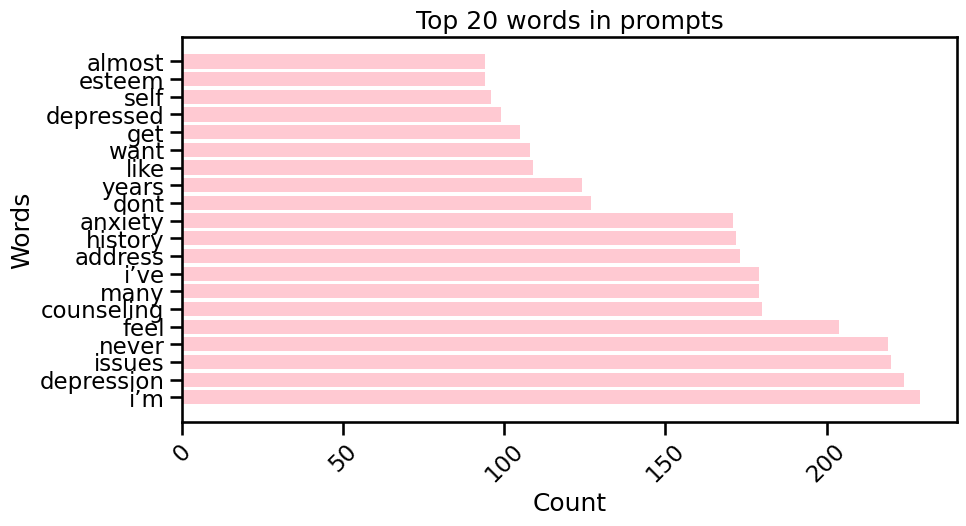

In [39]:
plt.figure(figsize = (10,5))
plt.barh(keys_q,values_q,color = 'pink', alpha = 0.85)
palette=("Blues_d")
plt.xlabel('Count')
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.title('Top 20 words in prompts')
sns.set_context('talk')

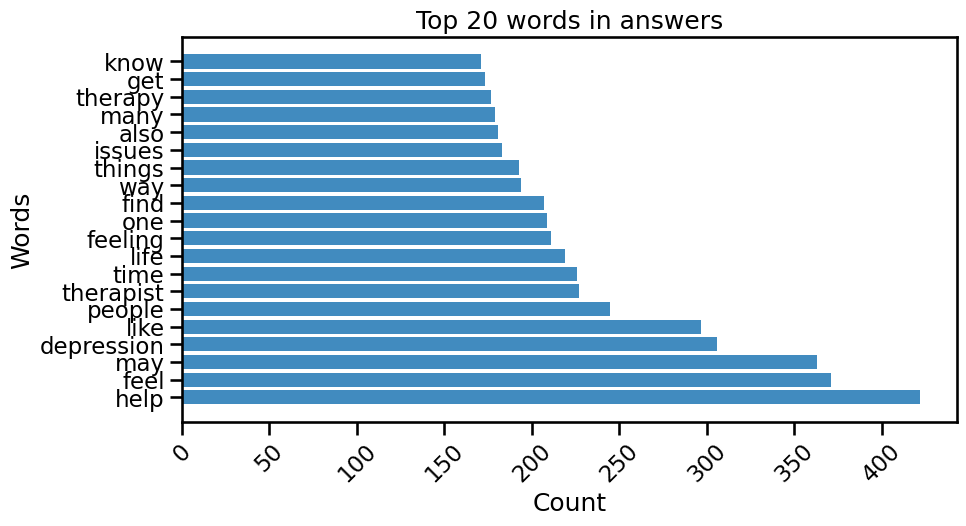

In [41]:
plt.figure(figsize = (10,5))
plt.barh(keys_a,values_a,alpha=0.85)
palette=("Blues_d")
plt.xlabel('Count')
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.title('Top 20 words in answers')
sns.set_context('talk')

### Generating word cloud for depression

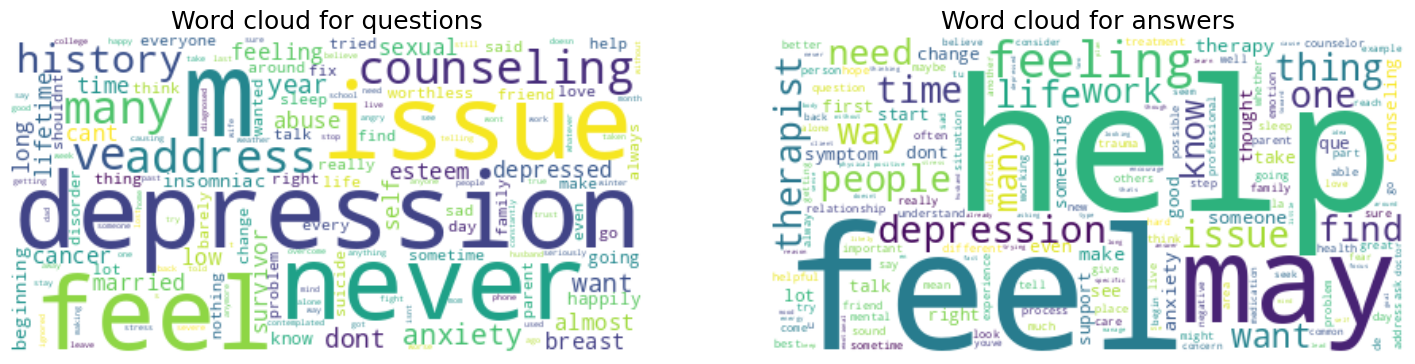

In [43]:
from wordcloud import WordCloud
fig, axs = plt.subplots(1,2 , figsize=(18,6))
clean_q = " ".join(df_new['clean_questionText'])
clean_a = " ".join(df_new['clean_answerText'])
ques_cloud = WordCloud(collocations = False, background_color = 'white').generate(clean_q)
answ_cloud = WordCloud(collocations = False, background_color = 'white').generate(clean_a)
axs[0].imshow(ques_cloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word cloud for questions')
axs[1].imshow(answ_cloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Word cloud for answers')

plt.show()